In [1]:
from transformers import BertTokenizer, BertModel, AlbertTokenizerFast, AlbertModel
import torch
import torch.nn.functional as F

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_bert_tokenizer_and_model(tokenizer_path, model_path):
    tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
    model = BertModel.from_pretrained(model_path)
    return tokenizer, model

def get_albert_tokenizer_and_model(tokenizer_path, model_path):
    tokenizer = AlbertTokenizerFast.from_pretrained(tokenizer_path)
    model = AlbertModel.from_pretrained(model_path)
    return tokenizer, model

In [3]:
def get_embedding(tokenizer, model, text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    with torch.no_grad():  # Turn off gradient tracking for faster inference
        outputs = model(**inputs)

    # The embeddings are in `outputs.last_hidden_state`
    # `outputs.last_hidden_state` is a tensor of shape [batch_size, sequence_length, hidden_size]
    embeddings = outputs.last_hidden_state
    
    # If you want to get the embedding for the [CLS] token (which is often used as a sentence-level representation):
    return embeddings#[:, 0, :]  # [CLS] token is the first token


In [4]:
math_albert_path = "AnReu/albert-for-arqmath-3"
desc_bert_path = "bert-base-uncased"

In [9]:
mtokenizer, mmodel = get_albert_tokenizer_and_model(math_albert_path, math_albert_path)
dtokenizer, dmodel = get_bert_tokenizer_and_model(desc_bert_path, desc_bert_path)

Some weights of the model checkpoint at AnReu/albert-for-arqmath-3 were not used when initializing AlbertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
reactions = ["[Blood-Lymph].CTLA4_mabB <-> Lymph_Node.CTLA4_mab", "[Blood-Lymph].CTLA4_mabB <-> Peripheral.CTLA4_mabP_leaky"]

In [11]:
emb1 = get_embedding(dtokenizer, dmodel, reactions[0])[:,0,:]
emb2 = get_embedding(dtokenizer, dmodel, reactions[1])[:,0,:]

In [12]:
F.cosine_similarity(emb1,emb2)

tensor([0.9652])

In [27]:
print(mtokenizer.tokenize(reactions[0]), dtokenizer.tokenize(reactions[0]))

['[', '▁blood', '-', '▁lymph', ']', '▁', '.', 'ct', 'la', '4', '_', '▁ma', 'bb', '<', '-', '>', '▁lymph', '_', '▁node', '.', 'ct', 'la', '4', '_', '▁mab'] ['[', 'blood', '-', 'l', '##ym', '##ph', ']', '.', 'ct', '##la', '##4', '_', 'mab', '##b', '<', '-', '>', 'l', '##ym', '##ph', '_', 'node', '.', 'ct', '##la', '##4', '_', 'mab']


In [67]:
# Define the input string
input_data = """
1 [Blood-Lymph].CTLA4_mabB <-> Lymph_Node.CTLA4_mab
2 [Blood-Lymph].CTLA4_mabB <-> Peripheral.CTLA4_mabP_leaky
3 [Blood-Lymph].CTLA4_mabB <-> Peripheral.CTLA4_mabP_tight
4 [Blood-Lymph].CTLA4_mabB <-> Tumor.CTLA4_mabt
5 [Blood-Lymph].CTLA4_mabB -> null
6 [Blood-Lymph].Effector_T_TB -> [Blood-Lymph].Effector_T_TB + [Blood-Lymph].Effector_TB
7 [Blood-Lymph].Effector_TB -> Liv_Spln_GI.EffT_GI_f_Vasc
8 [Blood-Lymph].Effector_TB -> Liv_Spln_GI.EffT_Liver_f_Vasc
9 [Blood-Lymph].Effector_TB -> Liv_Spln_GI.EffT_Spleen_f_Vasc
10 [Blood-Lymph].Effector_TB -> Lymph_Node.EffT_LN_f_Vasc
11 [Blood-Lymph].Effector_TB -> null
12 [Blood-Lymph].Effector_TB -> Peripheral.EffT_P_f_Vasc
13 [Blood-Lymph].Effector_TB -> Tumor.EffT_f_Vasc
14 [Blood-Lymph].PD1_mabb <-> Lymph_Node.PD1_mab
15 [Blood-Lymph].PD1_mabb <-> Peripheral.PD1_mabP_leaky
16 [Blood-Lymph].PD1_mabb <-> Peripheral.PD1_mabP_tight
17 [Blood-Lymph].PD1_mabb <-> Tumor.PD1_mabt
18 [Blood-Lymph].PD1_mabb -> null
19 [Blood-Lymph].PDL1_mabb <-> Lymph_Node.PDL1_mab
20 [Blood-Lymph].PDL1_mabb <-> Peripheral.PDL1_mabP_leaky
21 [Blood-Lymph].PDL1_mabb <-> Peripheral.PDL1_mabP_tight
22 [Blood-Lymph].PDL1_mabb <-> Tumor.PDL1_mabt
23 [Blood-Lymph].PDL1_mabb -> null
24 [Blood-Lymph].PDL1_mabb -> null
25 Liv_Spln_GI.EffT_GI_f_Vasc -> Liv_Spln_GI.EffT_Liver_f_Vasc
26 Liv_Spln_GI.EffT_GI_f_Vasc -> null
27 Liv_Spln_GI.EffT_Liver_AR_Vasc -> Liv_Spln_GI.EffT_LiverEx
28 Liv_Spln_GI.EffT_Liver_AR_Vasc -> null
29 Liv_Spln_GI.EffT_Liver_b_Vasc -> Liv_Spln_GI.EffT_Liver_AR_Vasc
30 Liv_Spln_GI.EffT_Liver_b_Vasc -> Liv_Spln_GI.EffT_Liver_f_Vasc
31 Liv_Spln_GI.EffT_Liver_b_Vasc -> null
32 Liv_Spln_GI.EffT_Liver_f_Vasc -> Lungs.EffT_f_LungsVasc
33 Liv_Spln_GI.EffT_Liver_f_Vasc -> null
34 Liv_Spln_GI.EffT_LiverEx -> Lymph_Node.EffT_LN_ExRec
35 Liv_Spln_GI.EffT_LiverEx -> null
36 Liv_Spln_GI.EffT_Spleen_AR_Vasc -> Liv_Spln_GI.EffT_SpleenEx
37 Liv_Spln_GI.EffT_Spleen_AR_Vasc -> null
38 Liv_Spln_GI.EffT_Spleen_b_Vasc -> Liv_Spln_GI.EffT_Spleen_AR_Vasc
39 Liv_Spln_GI.EffT_Spleen_b_Vasc -> Liv_Spln_GI.EffT_Spleen_f_Vasc
40 Liv_Spln_GI.EffT_Spleen_b_Vasc -> null
41 Liv_Spln_GI.EffT_Spleen_f_Vasc + Liv_Spln_GI.Spleen_Free_Sites -> Liv_Spln_GI.EffT_Spleen_b_Vasc + Liv_Spln_GI.Spleen_Free_Sites
42 Liv_Spln_GI.EffT_Spleen_f_Vasc -> Liv_Spln_GI.EffT_Liver_f_Vasc
43 Liv_Spln_GI.EffT_Spleen_f_Vasc -> null
44 Liv_Spln_GI.EffT_SpleenEx -> Lymph_Node.EffT_LN_ExRec
45 Liv_Spln_GI.EffT_SpleenEx -> null
46 Liv_Spln_GI.Liver_Free_Sites + Liv_Spln_GI.EffT_Liver_f_Vasc -> Liv_Spln_GI.EffT_Liver_b_Vasc + Liv_Spln_GI.Liver_Free_Sites
47 Lungs.EffT_AR_LungsVasc -> Lungs.EffT_LungsEx
48 Lungs.EffT_AR_LungsVasc -> null
49 Lungs.EffT_AR_LungsVasc -> null
50 Lungs.EffT_f_LungsVasc + Lungs.Lung_Free_Sites -> Lungs.EffT_r_LungsVasc + Lungs.Lung_Free_Sites
51 Lungs.EffT_f_LungsVasc -> [Blood-Lymph].Effector_TB
52 Lungs.EffT_f_LungsVasc -> null
53 Lungs.EffT_LungsEx -> Lymph_Node.EffT_LN_ExRec
54 Lungs.EffT_LungsEx -> null
55 Lungs.EffT_r_LungsVasc -> Lungs.EffT_AR_LungsVasc
"""

# Split the input into lines
lines = input_data.strip().split('\n')

# Initialize a list to hold the pairs of index and text
index_text_pairs = []

# Process each line
for line in lines:
    # Split on the first space to separate the index from the rest
    index, text = line.split(' ', 1)
    # Append the pair to the list
    index_text_pairs.append((int(index), text.strip()))

In [22]:
reactions =[text for (index, text) in index_text_pairs]

In [34]:
embs =[get_embedding(mtokenizer, mmodel, reaction)[:,0,:] for reaction in reactions]

In [35]:
A = torch.zeros((len(embs), len(embs)))

In [47]:
for i in range(len(embs)):
    for j in range(len(embs)):
        A[i,j] = F.cosine_similarity(embs[i], embs[j])

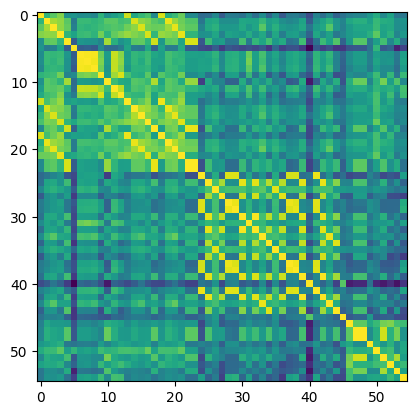

In [48]:
import matplotlib.pyplot as plt
plt.imshow(A)

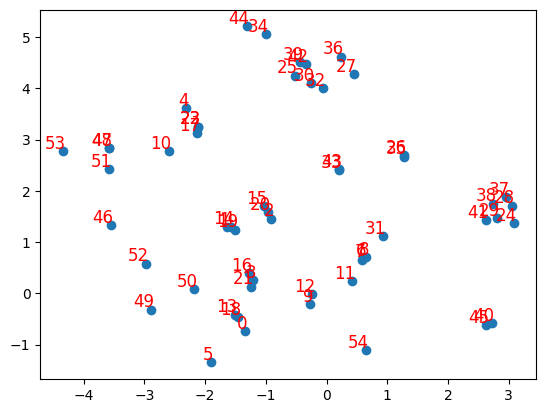

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, (x_val, y_val) in enumerate(zip(reduced_embeddings[:, 0].squeeze(), reduced_embeddings[:, 1].squeeze())):
    plt.text(x_val + 0.05, y_val + .05, str(i), fontsize=12, ha='right', color='red')
plt.show()

In [58]:
embeddings = torch.cat(embs)